In [1]:
import numpy as np
from pyDOE import lhs
#from simulation1Day import simulation, hypoGlicemia, hyperGlicemia, pidC1
from scipy.integrate import odeint
#from hovorka import modelPID

In [2]:
def modelPID(x, t, Kp, Ki, Kd):
    w = 100
    ka1 = 0.006  #
    ka2 = 0.06  #
    ka3 = 0.03  #
    kb1 = 0.0034  #
    kb2 = 0.056  #
    kb3 = 0.024  #
    u_b = 0.0555
    tmaxI = 55  #
    VI = 0.12 * w  #
    ke = 0.138  #
    k12 = 0.066  #
    VG = 0.16 * w  #
    # G = Q1 / VG
    F01 = 0.0097 * w  #
    FR = 0
    EGP0 = 0.0161 * w  #
    AG = 0.8  #
    Gmolar = 180.1559
    tmaxG = 40  #
    sp = 110 * VG / 18

    Q1, Q2, S1, S2, I, x1, x2, x3, tau, Dg, Ie, u = x
    dQ1 = - F01 - x1 * Q1 + k12 * Q2 - FR + EGP0 * (1 - x3) + (x[9] * AG * 1000 / Gmolar) * tau * np.exp(
        -tau / tmaxG) / (tmaxG ** 2)
    dQ2 = x1 * Q1 - (k12 + x2) * Q2
    dIe = sp - Q1
    de = - dQ1
    uNew = max(Ki * Ie + Kp * dIe + Kd * de, 0)
    dS1 = uNew + u_b - S1 / tmaxI
    dS2 = (S1 - S2) / tmaxI
    dI = S2 / (tmaxI * VI) - ke * I
    dx1 = - ka1 * x1 + kb1 * I
    dx2 = - ka2 * x2 + kb2 * I
    dx3 = - ka3 * x3 + kb3 * I
    dtau = 1
    dDg = 0
    dxdt = [dQ1, dQ2, dS1, dS2, dI, dx1, dx2, dx3, dtau, dDg, dIe, uNew - u]

    return dxdt

In [3]:
def simulation(timeOfMeals, dGs, model):
    ttot = [0]
    ytot = [97.77, 19.08024, 3.0525, 3.0525, 0.033551, 0.01899, 0.03128, 0.02681, 0.0, 0, 0, 0]
    x0 = ytot
    for i in range(len(timeOfMeals)):
        x0[8] = 0
        x0[9] = dGs[i]
        time = np.arange(0, timeOfMeals[i], 0.2)
        #t = timeOfMeals[i]
        y = odeint(model, x0, time)
        x0 = y[-1, :]
        ytot = np.vstack([ytot, y])
        ttot = np.hstack([ttot, time + ttot[-1]])
    return ttot, ytot


Kd = [0, -0.0602, -0.0573, -0.06002, -0.0624]
Ki = [0, -3.53e-07, -3e-07, -1.17e-07, -7.55e-07]
Kp = [0, -6.17e-04, -6.39e-04, -6.76e-04, -5.42e-04]

pidC1 = lambda x, t: modelPID(x, t, Kp[1], Ki[1], Kd[1])
pidC2 = lambda x, t: modelPID(x, t, Kp[2], Ki[2], Kd[2])
pidC3 = lambda x, t: modelPID(x, t, Kp[3], Ki[3], Kd[3])
pidC4 = lambda x, t: modelPID(x, t, Kp[4], Ki[4], Kd[4])

pidC1Noise = lambda x, t: modelPID(x, t, Kp[1], Ki[1], Kd[1])
pidC2Noise = lambda x, t: modelPID(x, t, Kp[2], Ki[2], Kd[2])
pidC3Noise= lambda x, t: modelPID(x, t, Kp[3], Ki[3], Kd[3])
pidC4Noise= lambda x, t: modelPID(x, t, Kp[4], Ki[4], Kd[4])


# pid5 = lambda x, t: modelPID(x, t, -0.1, 0, -0.1)
# pid6 = lambda x, t: modelPID(x, t, -5.12720526e-04, -1.16330231e-06, -6.54656447e-02)
# pid7 = lambda x, t: modelPID(x, t, -6.16146031e-04, -3.90083101e-07, -6.75289141e-02)
def hyperGlicemia(th):
    return lambda x : th-x
def hypoGlicemia(th):
    return lambda x : x-th

In [4]:
t_meal1 = np.random.normal(300, 60)
t_meal2 = np.random.normal(300, 60)
t_meal3 = 1440 - t_meal1 - t_meal2
dg1 = np.random.normal(40, 10)
dg2 = np.random.normal(90, 10)
dg3 = np.random.normal(60, 10)

t, y = simulation([t_meal1, t_meal2, t_meal3], [dg1, dg2, dg3], pidC1)

No handles with labels found to put in legend.


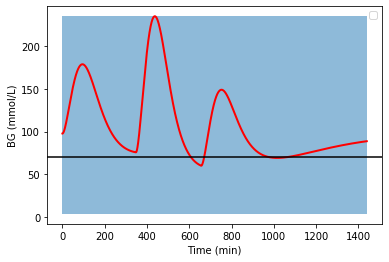

In [6]:
# plot results

import matplotlib.pyplot as plt

thresholdUp = 180;
thresholdDown = 70;

plt.fill_between([t[0],t[-1]], [4,4],[max(y[:,0]),max(y[:,0])],alpha=0.5)
plt.plot(t,y[:,0],'r-',linewidth=2)
plt.axhline(y=thresholdDown, color='k', linestyle='-')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('BG (mmol/L)')
plt.show()

In [1]:
from moonlight import * 

ModuleNotFoundError: No module named 'moonlight'